## ローパスフィルタ比較

入力$f(t)$
出力$y(t)$
時定数$\tau$
サンプリング周期$T$

### 一時遅れ
$$
\begin{aligned}
連続 \\
y &= 1 - e^{\frac{t}{\tau}} \\
離散化 \\
\alpha &= \frac{\tau}{T + \tau} \\
y_k &= \alpha y_{k-1} + (1 - \alpha) f_k \\
別の表示 \\
\beta &= \frac{T}{T + \tau} \\
y_k &= y_{k-1} + \beta(f_k - y_{k-1}) \\
カットオフ周波数 \\
f_c &= \frac{1}{2\pi\tau}\\
\end{aligned}
$$

### 移動平均 (移動数$N=3$)
$$
\begin{aligned}
y_k &= \frac{1}{3} (f_{k-2} + f_{k-1} + f_k) \\
カットオフ周波数 \\
f_c &= \frac{0.443}{\sqrt{N^2 - 1}} \frac{1}{T} \\
\end{aligned}
$$

### 中央値
$$
\begin{aligned}
y_k &= \operatorname{med}(f_{k-2}, f_{k-1}, f_k) \\
\end{aligned}
$$

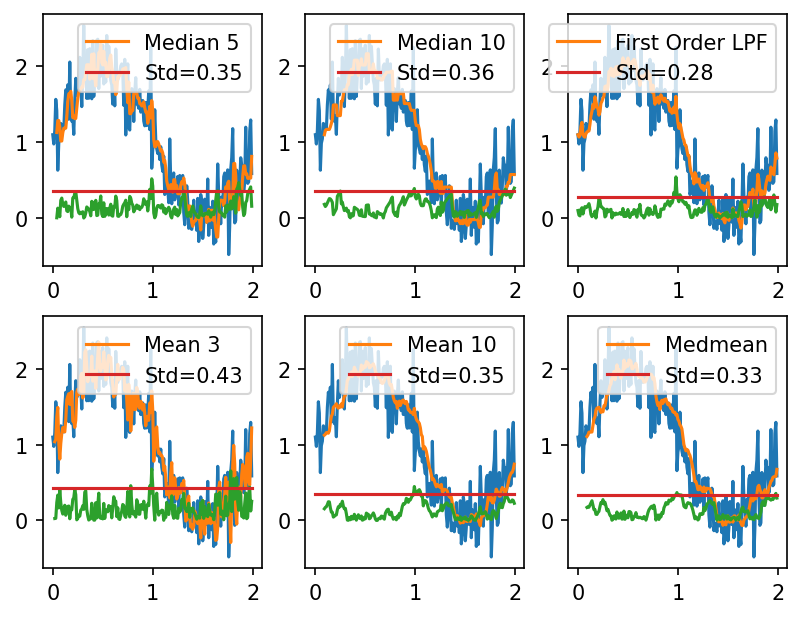

In [37]:
import matplotlib.pyplot as plt
import numpy as np

# モデル設定
dt = 10e-3 # 制御周期(100Hz = 10ms)
t = np.arange(0, 2, dt) # 時間(グラフの横軸) 0~10まで

# 入力 sin波+ノイズ
f0 = 1 + np.sin(np.pi * t)
dist = 0.3
f = f0 + np.random.normal(0, dist, len(t))

# シミュレーション
integral = np.zeros_like(t)
rc_filter = np.zeros_like(t)
mean3 = np.zeros_like(t)
mean10 = np.zeros_like(t)
median5 = np.zeros_like(t)
median10 = np.zeros_like(t)
medmean = np.zeros_like(t)

def mm9(arr):
  return np.sort(arr)[2:7].mean() if len(arr) >= 9 else np.nan

def calc_std(arr):
  return np.nanstd(np.abs(f0 - arr)) / dist

tau = 3 * dt # 時定数 30ms カットオフ周波数 5Hz
alfa = tau / (tau + dt)
beta = dt / (tau + dt)
# print(alfa, beta)
for i in range(len(t)):
  integral[i] = integral[i-1] + (f[i] - integral[i-1]) * beta
  rc_filter[i] = f[i] if i == 0 else alfa * rc_filter[i-1] + (1 - alfa) * f[i]
  mean3[i] = np.mean(f[i-2:i])
  mean10[i] = np.mean(f[i-9:i])
  median5[i] = np.median(f[i-4:i])
  median10[i] = np.median(f[i-9:i])
  medmean[i] = mm9(f[i-9:i])

fig = plt.figure(dpi=150)
ax = [fig.add_subplot(2,3,i) for i in range(1,7)]

ax[0].plot(t, f)
ax[0].plot(t, median5, label='Median 5')
ax[0].plot(t, np.abs(f0 - median5))
ax[0].plot(t, np.full_like(t, calc_std(median5)), label=f'Std={calc_std(median5):.2f}')

ax[1].plot(t, f)
ax[1].plot(t, median10, label='Median 10')
ax[1].plot(t, np.abs(f0 - median10))
ax[1].plot(t, np.full_like(t, calc_std(median10)), label=f'Std={calc_std(median10):.2f}')

ax[2].plot(t, f)
ax[2].plot(t, rc_filter, label='First Order LPF')
ax[2].plot(t, np.abs(f0 - rc_filter))
ax[2].plot(t, np.full_like(t, calc_std(rc_filter)), label=f'Std={calc_std(rc_filter):.2f}')

ax[3].plot(t, f)
ax[3].plot(t, mean3, label='Mean 3')
ax[3].plot(t, np.abs(f0 - mean3))
ax[3].plot(t, np.full_like(t, calc_std(mean3)), label=f'Std={calc_std(mean3):.2f}')

ax[4].plot(t, f)
ax[4].plot(t, mean10, label='Mean 10')
ax[4].plot(t, np.abs(f0 - mean10))
ax[4].plot(t, np.full_like(t, calc_std(mean10)), label=f'Std={calc_std(mean10):.2f}')

ax[5].plot(t, f)
ax[5].plot(t, medmean, label='Medmean')
ax[5].plot(t, np.abs(f0 - medmean))
ax[5].plot(t, np.full_like(t, calc_std(medmean)), label=f'Std={calc_std(medmean):.2f}')

for e in ax:
  e.legend(loc="upper right")
  # e.legend(loc="lower left")

plt.show()
